In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import math
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def p(s):
    print(s)
    
pd.DataFrame.len = pd.Index.len = lambda x: print(len(x))

In [33]:
# Common function definitions
def printStats(y_dev, y_pred):
    # Graph
    plt.scatter(y_dev, y_pred)
    plt.plot(y_pred,y_pred,color='black')
    plt.show()
    
    # Stats
    mae = mean_absolute_error(y_dev, y_pred).round(1)
    rmse = round(math.sqrt(mean_squared_error(y_dev, y_pred)),1)
    r2 = r2_score(y_dev, y_pred).round(2)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}')
    
def cvGrid(params):
    names = ['param_' + x for x in list(params.keys())]
    return pd.DataFrame(grid.cv_results_)[names+['mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time','std_fit_time','std_score_time']].sort_values(names)


In [8]:
# Partition training, dev, and test data
seasonHist = pd.read_csv('seasonHist.csv')
X = seasonHist \
    .loc[:,seasonHist.columns.str.contains('-\d+') | seasonHist.columns.str.match('fanPts')] \
    .drop('fanPts',axis=1) \
    .fillna(0)
y = seasonHist.fanPts

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_dev_raw, X_test_raw, y_dev, y_test = train_test_split(X_test_raw, y_test, test_size=0.5, random_state=0)

# Scale and normalize data
mms = preprocessing.MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train_raw)
X_dev_scaled, X_test_scaled = mms.transform(X_dev_raw), mms.transform(X_test_raw)

ss = preprocessing.StandardScaler()
X_train_std = ss.fit_transform(X_train_raw)
X_dev_std, X_test_std = ss.transform(X_dev_raw), ss.transform(X_test_raw)

# Manually downselect useful columns
keepCols = \
    X.columns.str.contains('fanPts') | \
    X.columns.str.contains('^complete_pass') | \
    X.columns.str.contains('rush_attempt') | \
    X.columns.str.contains('yards_gained') | \
    X.columns.str.contains('^touchdown')

X_train_select, X_dev_select, X_test_select = X_train_raw.loc[:,keepCols], X_dev_raw.loc[:,keepCols], X_test_raw.loc[:,keepCols]
# X_train_scaled_select, X_dev_scaled_select, X_test_scaled_select = X_train_scaled.loc[:,keepCols], X_dev_scaled.loc[:,keepCols], X_test_scaled.loc[:,keepCols]
# X_train_std_select, X_dev_std_select, X_test_std_select = X_train_std.loc[:,keepCols], X_dev_std.loc[:,keepCols], X_test_std.loc[:,keepCols]

### K Neighbors Regression

#### Base model

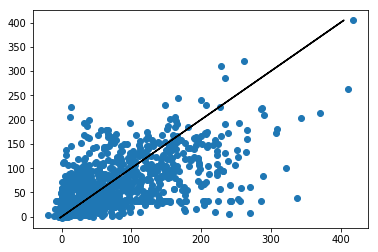

MAE: 33.1
RMSE: 48.8
R^2: 0.41


In [12]:
X_train, X_dev, y_train, y_dev = X_train_raw, X_dev_raw, y_train, y_dev

m = neighbors.KNeighborsRegressor()
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

printStats(y_dev, y_pred)

#### GridSearchCV

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.9min finished


{'metric': 'euclidean', 'n_neighbors': 38, 'weights': 'distance'}


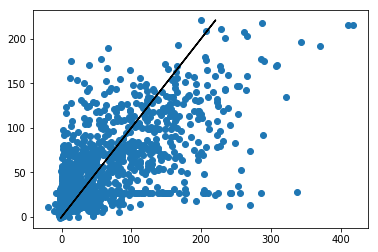

MAE: 31.6
RMSE: 47.4
R^2: 0.45


C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_

,param_n_neighbors,param_weights,param_metric,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
12,35,distance,euclidean,0.450,0.012,11,0.112,0.979,0.033,0.185
0,35,distance,manhattan,0.448,0.013,18,0.098,1.019,0.046,0.256
13,35,uniform,euclidean,0.448,0.011,15,0.152,1.326,0.111,0.341
1,35,uniform,manhattan,0.446,0.012,23,0.105,1.066,0.019,0.106
14,36,distance,euclidean,0.450,0.011,12,0.145,1.402,0.019,0.253
2,36,distance,manhattan,0.448,0.013,21,0.103,1.191,0.022,0.136
15,36,uniform,euclidean,0.448,0.010,16,0.103,0.859,0.024,0.107
3,36,uniform,manhattan,0.446,0.012,24,0.118,1.230,0.042,0.162
16,37,distance,euclidean,0.450,0.011,10,0.115,0.989,0.040,0.206
4,37,distance,manhattan,0.449,0.012,13,0.095,1.040,0.018,0.116


In [40]:
X_train, X_dev, y_train, y_dev = X_train_raw, X_dev_raw, y_train, y_dev

params = {
    'weights':['distance','uniform'],
    'metric':['manhattan','euclidean'],
    'n_neighbors':[x for x in range(35,41)],
}

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    params,
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

printStats(y_dev, y_pred)

cvGrid(params)

#### GridSearchCV, Scaled

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   41.3s finished


{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'distance'}


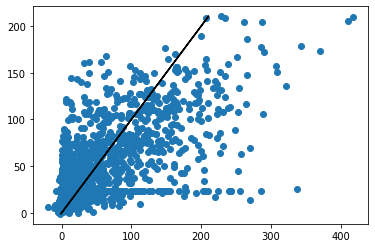

MAE: 31.3
RMSE: 47.7
R^2: 0.44


,param_weights,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
12,distance,euclidean,35,0.439,0.010,10,0.341,1.820,0.058,0.233
14,distance,euclidean,36,0.439,0.011,16,0.246,1.963,0.029,0.219
16,distance,euclidean,37,0.439,0.011,12,0.241,2.030,0.004,0.093
18,distance,euclidean,38,0.440,0.010,7,0.281,2.074,0.059,0.304
20,distance,euclidean,39,0.441,0.010,5,0.430,2.895,0.044,0.600
22,distance,euclidean,40,0.441,0.010,3,0.449,2.229,0.095,0.511
0,distance,manhattan,35,0.440,0.012,8,0.243,1.790,0.047,0.270
2,distance,manhattan,36,0.440,0.013,9,0.211,2.018,0.018,0.175
4,distance,manhattan,37,0.441,0.013,6,0.269,2.332,0.016,0.130
6,distance,manhattan,38,0.441,0.012,4,0.270,2.446,0.033,0.458


In [5]:
X_train, X_dev, y_train, y_dev = X_train_scaled, X_dev_scaled, y_train, y_dev

params = {
    'weights':['distance','uniform'],
    'metric':['manhattan','euclidean'],
    'n_neighbors':[x for x in range(35,41)],
}

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    params,
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

printStats(y_dev, y_pred)

cvGrid(params)

#### GridSearchCV, Standardized

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


{'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}


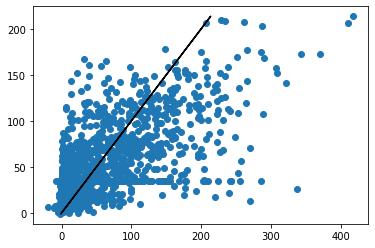

MAE: 32.8
RMSE: 47.8
R^2: 0.44


,param_weights,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
12,distance,euclidean,35,0.436,0.010,17,0.574,4.013,0.100,1.648
14,distance,euclidean,36,0.436,0.010,13,0.473,3.411,0.096,1.184
16,distance,euclidean,37,0.436,0.009,16,0.394,2.640,0.020,0.977
18,distance,euclidean,38,0.436,0.009,14,0.378,3.714,0.022,0.938
20,distance,euclidean,39,0.436,0.009,10,0.416,4.057,0.077,0.817
22,distance,euclidean,40,0.437,0.009,8,0.538,4.036,0.012,0.821
0,distance,manhattan,35,0.438,0.011,6,0.526,4.308,0.042,0.171
2,distance,manhattan,36,0.439,0.011,3,0.261,3.252,0.028,0.590
4,distance,manhattan,37,0.439,0.011,5,0.372,2.951,0.046,0.281
6,distance,manhattan,38,0.439,0.011,4,0.414,3.304,0.007,0.602


In [6]:
X_train, X_dev, y_train, y_dev = X_train_std, X_dev_std, y_train, y_dev

params = {
    'weights':['distance','uniform'],
    'metric':['manhattan','euclidean'],
    'n_neighbors':[x for x in range(35,41)],
}

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    params,
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

printStats(y_dev, y_pred)

cvGrid(list(params.keys()))

#### GridSearchCV, hand-selected features

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   45.0s finished


{'metric': 'euclidean', 'n_neighbors': 54, 'weights': 'distance'}


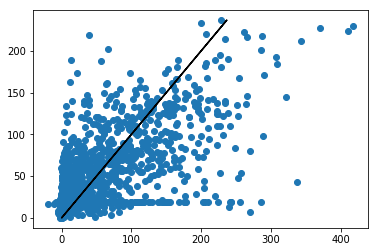

MAE: 30.4
RMSE: 47.0
R^2: 0.46


C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\e358021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_

,param_weights,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
11,distance,euclidean,50,0.467,0.018,17,0.038,0.171,0.011,0.017
12,distance,euclidean,52,0.467,0.018,16,0.041,0.161,0.012,0.011
13,distance,euclidean,54,0.469,0.018,1,0.040,0.179,0.012,0.029
14,distance,euclidean,56,0.468,0.018,4,0.052,0.218,0.015,0.012
15,distance,euclidean,58,0.468,0.018,11,0.054,0.220,0.017,0.018
16,distance,euclidean,60,0.468,0.017,10,0.054,0.234,0.029,0.043
17,distance,euclidean,62,0.469,0.017,3,0.055,0.232,0.018,0.026
18,distance,euclidean,64,0.468,0.017,5,0.052,0.226,0.013,0.016
19,distance,euclidean,66,0.469,0.017,2,0.050,0.244,0.012,0.024
20,distance,euclidean,68,0.468,0.017,8,0.055,0.236,0.018,0.019


In [42]:
X_train, X_dev, y_train, y_dev = X_train_select, X_dev_select, y_train, y_dev

params = {
    'weights':['distance'],
    'metric':['manhattan','euclidean'],
    'n_neighbors':[x for x in range(50,71,2)],
}

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    params,
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

printStats(y_dev, y_pred)

cvGrid(params)